# Model Performance Metrics for evaluating Supervised Machine learning algorithms using scikit-learn

Predictive analysis can be considered to be like a constructive feedback loop. You first build a initial model. Understand how it behaves by getting feedback from various applicable metrics and then redesign the model. This process will continue till we are able to achieve a desirable accuracy. Evaluation metrics help us gauge the performance of a model and are able to discriminate among the different model designs.

Every machine learning algorithm have more than one metric to help evaluate the performance, and it is important to choose the right one as it ultimately helps you choose an algorithm to work with or rely on.

In this tutorial, we will understand different machine learning performance metrics in Python with scikit-learn which I will refer as SkLearn.

We will focus on Supervised algorithms inthis tutorial and understand the different metrics for Classification and Regression problems, using two different datasets.

### Metrics for Classification:

Classification problems are the most common type of machine learning problem. It also has many different metrics for evaluation. We try to measure the performance of a Classifier of the given Classification problem at hand.

Performance measured is not just a count of correct classifications, classifiers produce a score that could aid in getting the thresholded to decide the classification. A score is usually between 0.0 which indicates definitely negative and 1.0 which indicates definitely positive.In general, we consider a score above 0.5 as positive.

However, if we apply any threshold to the given dataset at hand in which PP is the positive population and NP is the negative population. We will further get true positives (TP), false positives (FP), true negatives (TN) and false negatives (FN). We need a method which will take into account all of these numbers.

Once we are able to calculate the measures for all the above values, some useful metrics can be calculated as below:

    Accuracy (which indicates (1 – Error) ) = (TP + TN)/(PP + NP) = Pr(C)
        where Pr(C) indicates the probability of a correct classification
    Sensitivity (also known as Recall) = TP/(TP + FN) = TP / PP 
         this measures the proportion of positive values that are correctly identified as such
    Specificity = TN/(TN + FP) = TN / NP
         this measures the proportion of negative values that are correctly identified as such 
    Precision (also called positive predictive value) = fraction of relevant values among the retrieved values

Now let us explore how we can use this basic knowledge of measures to implement different performance metrics with the help of an example. We will be performing KNN classfication in this example.

We will review how to use the following metrics for classification in this tutorial:

    a. Classification Accuracy
    b. Confusion Matrix
    c. Area Under ROC Curve
    d. F1 Score
         Classification Report
    f. k-fold cross validation

### Import packages

Conventionally we tend to import all the necessary packages from python in the start, but to ease the understanding of the different functions we will explore further, we will only import a few universally required ones. The other necessary imports will be found at the code chunks that are associated with them.

In [300]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn import metrics


import matplotlib.pyplot as plt
%matplotlib inline

###  Load the dataset

Alright, now we're ready to load our data set. For our classification problem we will be choosing a dataset that SkLearn offers which is a wine dataset. `load_wine` is a function that retrives the wine dataset from SkLearn.

In [301]:
from sklearn import datasets
from sklearn.datasets import load_wine

features, target = load_wine(return_X_y=True)

wine = datasets.load_wine()
class_names = wine.target_names
print(class_names)

['class_0' 'class_1' 'class_2']


We could see that the target has three classes of wine. Let us explore these classes by understanding their counts and total length.

In [302]:
import collections

print("Target length:",len(target))
Target_Counter = collections.Counter(target)
print(" \n Count of each target class : \n\n",Target_Counter)

Target length: 178
 
 Count of each target class : 

 Counter({1: 71, 0: 59, 2: 48})


We understood the target, but what are the different features that could be used to classify?
In order to understand the different features let us see their names. But what do these names mean? to understand that we will use a function called `DESCR` on the wine dataset.

In [303]:
print("Features length: ",len(features),"\n")
print("Features data:  \n",wine.feature_names,"\n\n")
print(wine.DESCR)

Features length:  178 

Features data:  
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 


Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    

### Split data into training and test sets

It is common practise in the industry to split the dataset into train and test portions to help model evaluation. SkLearn provides us with a good function to ease the split of the dataset. In this example we will split the train and test data in 75:25 ratio respectively.

In [304]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 40
# Split the dataset using 25% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.25,
                                                    random_state=RANDOM_STATE)

### Build the model and make predictions

As we discussed earlier in this example we will build a k-Nearest Neighbor (kNN) model. It makes predictions by locating similar cases to a given data point by using a similarity function. It then returns the average of the most similar data points.

We will fit this model on the `X_train` and `y_Train` data that we get after spliting the original wine dataset. To make things simple we will called the actual values of the target y_test values as `expected` and assign to predictions made on the X_test data as `predictions`. We will repeatedly be using these variables to evaluate the different metrics that we will explore.

In [305]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

# fit the model
model.fit(X_train, y_train)
print(model)

# make predictions
expected = y_test
predicted = model.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


Now we are ready to explore the different Model evaluation metrics.

### Model Evaluation Metrics


### a. Accuracy

The champion of all measures of classifier performance in the industry is accuracy. It measures the percentage of correctly obtained classifications.

This metric is easy to understand and helps in making comparison of the performance of different classifiers easy as well. The disadvantage is that it ignores many of the factors which should be taken into consideration when evaluating the performance of a classifier(in a more honest way).

Sklearn has a function called accuracy_score that computes the accuracy of a given model's predictions. It does this by either getting the fraction(which is the default case) or getting the count of the correct predictions.

When we are performing a multilabel classification, as in this case, this function returns a subset accuracy . If all the predicted target values for a given dataset strictly equal or match the true targets then accuracy is 1 else it is 0.

Syntax:
`sklearn.metrics.accuracy_score(expected, predicted, normalize=True, sample_weight=None)`

In [306]:
from sklearn.metrics import accuracy_score

accuracy_score(expected, predicted)
print("Accuracy score: ",accuracy_score(expected, predicted))
accuracy_score(expected, predicted, normalize=False)
print("Accuracy score without normalization: ",accuracy_score(expected, predicted, normalize=False))

Accuracy score:  0.6
Accuracy score without normalization:  27


Interpretation:

The accuracy score here is 0.6, which signifies that the model performance isn't bad but isn't the best. It would be advisable to redesign the model by doing another feature selection process. The goal is to try and incorporate relevant features so that our model accuracy increases. An accuracy of above 0.9 is considered to be very good.

### b. Confusion Matrix:

Confusion matrix is a quick and easy way of presentating the accuracy of a model. It basically elaborates on the number of false positives, false negatives, true positives, and true negatives (that we earlier saw), from the prediction output. It got it's name from the fact that it simply makes it easy for a person to see if the model is consufing two classes, for example by mislabelling one class as another.

Here we will be representing the matrix in two ways. One way is the direct method of representing it as a matrix. The other way is to represent it as a heatmap. Heatmaps are more intuitive and faster to understand.

The matrix on the x-axis has predictions and on the y-axis has accuracy outcomes. Each cell of the table like matrix has the number of predictions made by a machine learning algorithm, which in our case is the KNN Classifier.

In [307]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(expected, predicted)
print("Confusion Matrix: \n",confusion_mat)

Confusion Matrix: 
 [[12  0  1]
 [ 1  9  4]
 [ 2 10  6]]


Heat map of confusion matrix: 



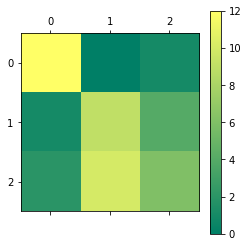

In [308]:
print("Heat map of confusion matrix: \n")

plt.matshow(confusion_mat, cmap='summer')
plt.colorbar()

Interpretation:

From the above confusion matrix and heatmap we can try and collectively understand the results. All the correct predictions are in the diagonal of the matrix. This makes it easy for us to visually evaluate the matrix for prediction errors since they are represented by values outside the diagonal.

We know that the total count if we add the cells of the matrix is 45. The confusion matrix in this case is indicating that out of the total 15 class_0 category values, the model wrongly predicted that 1 belonged to class_1 and 2 belonged to class_2.

Another major red alert would be the 10 of the 19 class_1 class being predicted wrongly that it belongs to the class_2.

We can conclude that this model is not effective in predicted the given data. We may now want to change the type of model we build for this data, or inspect the dataset itself to understand what is causing the wrong predictions.

### c. Area under ROC Curve
Area under the ROC curve is one of the popular metrics used in the data science industry. To understand what it implies we first need to under what ROC curve is. ROC curve is simply the plot between sensitivity and false positive rate or (1- specificity).

In this section we will plot and ROC curve and measure the Area under ROC Curve (AUC). The visual representation is not required but it will help us understand the evaluation better.

AUC values have generally accepted thumb rules that will help us evaluate the performance:

    0.90-1    = excellent (A)
    0.80-0.90 = good      (B)
    0.70-0.80 = fair      (C)
    0.60-0.70 = poor      (D)
    0.50-0.60 = fail      (F)

SkLearn offers roc_auc_score and roc_curve to help us represent and calculate the ROC curve and the AUC score.

Unlike the above two metrics, here we will need to calculate `y_scores`, which in our example we will call ypred_knn. It is done by predicting the probability scores on the test data. It represents the target scores, can either be probability estimates of the positive class or confidence values.

In [263]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

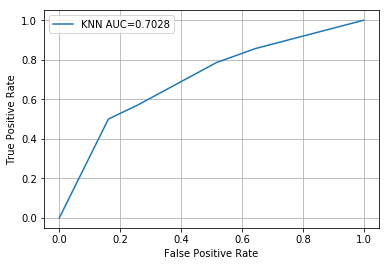

In [264]:
ypred_knn = model.predict_proba(X_test)[:,1]

plt.figure()

#fpr = False Positive Rate and tpr = True Positive Rate
fpr, tpr, _ = roc_curve(y_test, ypred_knn, pos_label=1)
auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label="KNN AUC=" + "{:.4f}".format(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()
plt.show()

Interpretation:

We get an AUC of 0.7028 which falls into the fair category. In this situation one can decide to continue with this model or re-design or change the classifier to get a higher AUC score.

### d. F1 Score

F1 Score is used to measure the test's accuracy. Mathematically, F1 Score is actually the Harmonic Mean between precision and recall. F1 Score tries to find the balance between precision and recall. It helps a person understand how precise and how robust his classifier is.

The range for F1 Score is between 0 and 1. Greater the F1 Score, the better is the performance of the model.

In [265]:
from sklearn.metrics import f1_score

print("F1 Score: ",f1_score(expected, predicted, average='macro'))

F1 Score:  0.605463502015


Interpretation:

The F1 score is not as high as we would like it to be. This signifies that this model is again not performing too well.

#### Classification report:

To better understand the mechanics of the calculation of F1 score, it would be advisable to look at precision and recall values as well.
SkLearn does a great job in providing us with a function that conveniently reports the precision, recall and f1 scores all together. It helps in giving us a quick idea of the accuracy of a model using a number of measures.

The `classification_report()` function displays the precision, recall, f1-score and support for each class in our model.

In [266]:
# summarize the fit of the model for each class
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.47      0.64      0.55        14
          2       0.55      0.33      0.41        18

avg / total       0.60      0.60      0.58        45



Cross validation isn’t a evaluation metric which is used to understand the model accuracy. The essential idea behind cross validation is that it's result gives a good intuition by generalizing the performance of a given model.

### f. Cross Validation

Cross Validation is one of the most important concepts in any type of data modelling. It essentially asks us to try to leave a sample of our dataset on which you do not train the model and test the model on this sample before eventually finalizing the model.

We will be performing k-Fold cross validation in this example. The biggest advantage of using k-fold cross validation is that it helps us in avoiding over-fitting of our data. In this validation we will be calculating the performance of the model at every fold. The performance metrics at each of the k folds of modelling are close to each other and the mean of metric is highest. This means that:

    "The hyperparameter with the best performance averaged across k-folds is chosen"
    

In our example, we will again evaluate on the KNN classifier model and apply k-fold cross validation on that. It will help us understand which hyperparameter performes the best. In order to do this, we will perform cross valiation in two ways
    
    1. KFold
    2. StratifiedKFold
        here the cross-validation object is a variation of KFold that returns stratified folds
    

#### Using Kfold cross validation:

In [312]:
kfold = model_selection.KFold(n_splits=5, random_state=10)
cross_val_output = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')

In [313]:
print("Accuracy: \nmean = %.3f standard deviation = %.2f" % (cross_val_output.mean(), cross_val_output.std()))

Accuracy: 
mean = 0.644 standard deviation = 0.11


You can see that the ratio is represented as a float. To get a percentage representation, we can multiply the value by 100, obtaining an accuracy score of 64.4% in our example at hand. Again, this is not a desirable score. We might want to reconsider the type of classifier or the features that we selected.

#### Using StratifiedKfold cross validation:

In this type, we will consider the entire original dataset by asking the k_fold function to split the features and targets implicitly. This will help us in getting better results as the computer is choosing the splits. We will run 5 folds and for each k value that we evaluate the accuracy and display the same. Eventually we will choose the k value that is giving us the best accuracy and use it to plot the ROC curve and calculate the AUC as well.

In [318]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

num_folds = 5
k_fold = StratifiedKFold(num_folds)
param_values = np.arange(1, 5, 1)

arg_max = -np.inf
best_k = None
for i in param_values:
    fold_scores = []
    print("k = " , str(i))
    for k, (train, val) in enumerate(k_fold.split(features, target)):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(features[train], target[train])
        predicted = knn.predict(features[val])
        expected = target[val]
        alpha = f1_score(expected, predicted, average='macro')
        fold_scores.append(alpha)
        print("\t[fold {0}] accuracy: {2:.5f}".format(k, i, alpha))
        
    cross_val_score = np.mean(fold_scores)
    print("Mean F1 score: ", str(cross_val_score),"\n")
    
    if cross_val_score > arg_max:
        arg_max = cross_val_score
        best_k = i
            
print("\nThe best k value for stratified K-Fold validation is : ",best_k)

k =  1
	[fold 0] accuracy: 0.78293
	[fold 1] accuracy: 0.66045
	[fold 2] accuracy: 0.65011
	[fold 3] accuracy: 0.67302
	[fold 4] accuracy: 0.79960
Mean F1 score:  0.71322235136 

k =  2
	[fold 0] accuracy: 0.51897
	[fold 1] accuracy: 0.61898
	[fold 2] accuracy: 0.59541
	[fold 3] accuracy: 0.61050
	[fold 4] accuracy: 0.70960
Mean F1 score:  0.610691194974 

k =  3
	[fold 0] accuracy: 0.61342
	[fold 1] accuracy: 0.72077
	[fold 2] accuracy: 0.65873
	[fold 3] accuracy: 0.63175
	[fold 4] accuracy: 0.82508
Mean F1 score:  0.689950324501 

k =  4
	[fold 0] accuracy: 0.59799
	[fold 1] accuracy: 0.71282
	[fold 2] accuracy: 0.61111
	[fold 3] accuracy: 0.61050
	[fold 4] accuracy: 0.68401
Mean F1 score:  0.643287880578 


The best k value for stratified K-Fold validation is :  1


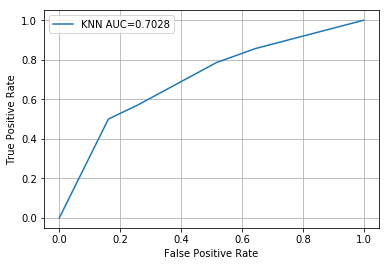

In [316]:
# choosing the best k value to define the new model
knn = KNeighborsClassifier(n_neighbors=best_k)

#fitting the model on the original features and targets
knn.fit(features, target)

#calculating the probability scores again
ypred_knn = model.predict_proba(X_test)[:,1]

plt.figure()

#fpr = False Positive Rate and tpr = True Positive Rate
fpr, tpr, _ = roc_curve(y_test, ypred_knn, pos_label=1)
auc = np.trapz(tpr, fpr)
plt.plot(fpr, tpr, label="KNN AUC=" + "{:.4f}".format(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()
plt.show()

For this particular example, the AUC value does not change even after choosing the best hyperparameter value to design the model. We obtain the same AUC score as before.

## Metrics for Regression:

Regression problems are supervised machine learning models in which the output is continuous. 
Regression helps us to perform modelling and analyzing with a given dataset to predict the relationship between a dependent and independent variable. We do this by fitting a curve to the dataset in such a way that the differences between the distances of points of data from the curve is minimized

We will focus on the 3 most common metrics for evaluating predictions on regression machine learning problems:

    a. Mean Absolute Error
    b. Mean Squared Error
    c. R^2
    
We will also take a look on how to visualize the error in a more graphical way by using:

    d. Residual Plots


Let us take as an example the most well known regression of them all, Linear Regression. Here, we will take the Boston dataset from SKLearn to perform our regression analysis. This is a Boston Housing Data Set that gives you information concerning housing in the area of Boston Mass, collected by the U.S Census Service. Let us start by loading and exploring the dataset.

In [277]:
from sklearn.datasets import load_boston
# Loading the dataset. 'boston_dataset' is a dict which has various keys which can be accessed and explored.
boston_dataset = load_boston()

In [278]:
print(boston_dataset.feature_names,"\n\n")
# Exploring the contents of the dataset
print(boston_dataset.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full

Just to ease things up, I will create a dataframe containing the data and the column names called 'boston_dataframe'.

In [279]:
boston_dataframe = pd.DataFrame(boston_dataset.data)
boston_dataframe.columns = boston_dataset.feature_names

Now we need to get the target variable, which is the pricing data. We will use this as the test data to evaluate the regression model.

    boston_dataset.target contains the required housing prices.


In [280]:
boston_dataframe['Housing_Price'] = boston_dataset.target
print(boston_dataframe.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Housing_Price  
0     15.3  396.90   4.98           24.0  
1     17.8  396.90   9.14           21.6  
2     17.8  392.83   4.03           34.7  
3     18.7  394.63   2.94           33.4  
4     18.7  396.90   5.33           36.2  


Now we will fit a linear regression model and predict the Boston housing prices. We will use the least squares method to estimate the coefficients of the model.

        Dependent variable    :    Y = boston housing price
        Independent variables :    X = all the other features apart from price

In [281]:
X = boston_dataframe.drop('Housing_Price',axis=1)

Here, we will again split the dataset using SkLearn's train_test_split. This time we will split the train and test data in 70:30 ratio.

In [282]:
from sklearn.model_selection import train_test_split

# Split the dataset using 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, boston_dataframe.Housing_Price,
                                                    test_size=0.30,
                                                    random_state=10)

Now we will define the model and fit the model with X_train and y_train data. We will then use the model to predict the housing prices on the X_train data and the X_test data.

Unlike in Classification problems, in regression we should explore the training data error and test data error. Hence we will predict on the train and test data.

In [283]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

Now that we have built the model and predicted on the train and test data, we will evaluate how well our model is behaving with the given dataset at hand.

### a. Mean Absolute Error

The Mean Absolute Error (or MAE) is simply the sum of absolute differences between predicted values and expected values. In more simple terms it gives us an idea of how wrong the predictions are.

The MAE measures how far the estimates differ from actual values by considering its absolute differences. In the industry it is mostly used in time series forecasting.

The only disadvantage of this measure is that it gives us a good idea of the magnitude of the error, but no idea of the direction of the error by specifying if the predictions were over or under.

                  "A value of 0 indicates perfect predictions in other words, 0 errors."

In order to better understand the error measure we will try to explore it in 3 different ways:

#### 1. Using SkLearn

The function 'mean_absolute_error' in Sklearn will help us measure the MAE by simply providing the expected and predicted values.

In [286]:
from sklearn.metrics import mean_absolute_error
print("\nMean Absolute Error on the train data",mean_absolute_error(y_train, predict_train),"\n")
print("Mean Absolute Error on the test data",mean_absolute_error(y_test, predict_test),"\n")


Mean Absolute Error on the train data 3.08759846343 

Mean Absolute Error on the test data 3.7083644 



#### 2. Calculating directly using a formula

If you want to understand the math behind MAE, we can easily see how it is calculated by using the formula code below:

In [293]:
print("\nCalculating MAE with Y_train:", np.sum(np.absolute((y_train - model.predict(X_train))))/len(y_train),"\n")
print("Calculating MAE with X_test, Y_test:", np.sum(np.absolute((y_test - model.predict(X_test))))/len(y_test),"\n")


Calculating MAE with Y_train: 3.0875984634310503 

Calculating MAE with X_test, Y_test: 3.7083644000023583 



#### 3. Using kFold cross validation
If you are performing kFold cross validation, then you will have to specify to Sklearn fucntion cross_val_score that we want to measure the 'neg_mean_absolute_error'. In order to evaluate the metric we will need to take the mean and standard deviations of the results. This metric here is inverted and hence the output is increasing. 

In [289]:
kfold = model_selection.KFold(n_splits=5, random_state=5)
evaluation_metric = 'neg_mean_absolute_error'
cross_val_output = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=evaluation_metric)
print("Negative Mean Absolute Error: \nmean = %.3f standard deviation = %.2f" % (cross_val_output.mean(), cross_val_output.std()),"\n")

Negative Mean Absolute Error: 
mean = -4.269 standard deviation = 0.70 



Interpretation of the values:

From the above results we can see that the MAE values calculated indicate that the model fit isn't bad but not idea as it is not very close to 0.

### b. Mean Squared Error

The Mean Squared Error (or MSE) is similar to the mean absolute error as it also provides us a good idea of the magnitude of the error. It is one of the most popularly used metric in regression problems. The assumption that MSE follows is that the error values are unbiased and follow a normal distribution.

The squared feature of this metric helps us deliver more robust outputs which prevent the cancelling of the positive and negative error values. Hence, it is somewhat better than MAE as it avoids absolute values.

                    "MSE is non-negative and the closer it is to zero is better"

#### 1. Using SkLearn

The function 'mean_squared_error' in Sklearn will help us measure the MSE by again providing the expected and predicted values.

In [292]:
from sklearn.metrics import mean_squared_error
print("\nMean Squared Error on the train data",mean_squared_error(y_train, predict_train),"\n")
print("Mean Squared Error on the test data",mean_squared_error(y_test, predict_test),"\n")


Mean Squared Error on the train data 19.4565693282 

Mean Squared Error on the test data 29.3579796452 



#### 2. Calculating directly using a formula

We can easily calculate MSE by using the formula code below:

In [243]:
print("Calculate MSE with Y_train:", np.mean((y_train - model.predict(X_train)) ** 2),"\n")
print("Calculate MSE with X_test, Y_test:", np.mean((y_test - model.predict(X_test)) ** 2),"\n")

Calculate MSE with Y_train: 19.45656932822032 

Calculate MSE with X_test, Y_test: 29.357979645158473 



Interpretation of the results:

We can see that the regression error is very high in the case of MSE. It could be because of an independent variable causing high error in the regression analysis. After looking at the high value of the error it gives us an opportunity to re-evaluate the features we selected and re-do the analsysis to get better results.

#### 3. Using kFold cross validation
We need to specify to Sklearn fucntion cross_val_score that we want to measure the 'neg_mean_squared_error'. This metric here again is inverted and hence the output is increasing. 

In [244]:
kfold = model_selection.KFold(n_splits=5, random_state=5)
evaluation_metric = 'neg_mean_squared_error'
cross_val_output = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=evaluation_metric)
print("Negative Mean Squared Error: \nmean = %.3f standard deviation = %.2f" % (cross_val_output.mean(), cross_val_output.std()),"\n")

Negative Mean Squared Error: 
mean = -35.203 standard deviation = 9.96 



### c. R-Squared


The R Squared or R^2 gives us a general indication of the goodness of fit the predicted and expected values. Statistical, it gives us a measure called as the coefficient of determination.

This metric ranges between value between 0 and 1; 0 indicating no fit at all and 1 indicating perfect fit. It could be under 0 or over 1 as well. This situation can occur when the model fits the train and test data worse than a horizontal line.

#### 1. Using SkLearn

The function 'mean_absolute_error' in Sklearn will help us measure the MAE by simply providing the expected and predicted values.

In [294]:
from sklearn.metrics import r2_score

print("R-Squared on train data: ",r2_score(y_train, predict_train),"\n")
print("R-Squared on test data: ",r2_score(y_test, predict_test),"\n")

R-Squared on train data:  0.749580101504 

R-Squared on test data:  0.699304139171 



Interpretation of results:

We can see that on the train data the R-squared value is slightly higher than on the test data. But both are closer to 1 indicating that it is a good fit.

#### 2. Using kFold cross validation
We need to specify to Sklearn fucntion cross_val_score that we want to measure the 'r2'. 

In [246]:
kfold = model_selection.KFold(n_splits=5, random_state=5)
evaluation_metric = 'r2'
cross_val_output = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=evaluation_metric)
print("R-Squared: \nmean = %.3f standard deviation = %.2f" % (cross_val_output.mean(), cross_val_output.std()),"\n")

R-Squared: 
mean = 0.578 standard deviation = 0.15 



Cross validation on the other hand shows that it is neither a good or bad fit.

### d. Residual Plots

Even though residual plots aren't a metric to evaluate a model, it is a good way to visualize the errors and hence it will be discussed. We will plot a residual plot for our boston data regression analysis. To interpret the plot, we need to see the distribution of the scatter points around the line zero as indicated in the chart. If the model predicts well then the scatter points should be randomly scattered around zero. If you observe any form of structure in your points, then your model is failing to capture something.For example: An interaction variable made of 2 variables that isn't being considered. After you observe some structure in your pointsit is advisable to revisit the design of the model to check how well you are doing with your model parameters.

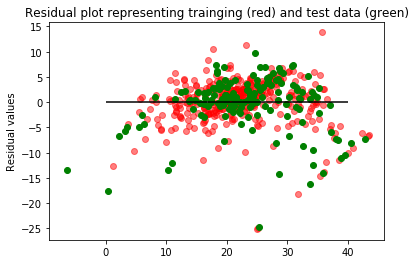

In [297]:
xpred_train = model.predict(X_train)
xpred_test = model.predict(X_test)

plt.scatter(xpred_train, xpred_train-y_train, c='r', alpha = 0.5)
plt.scatter(xpred_test, xpred_test-y_test,c='g')
plt.title("Residual plot representing trainging (red) and test data (green)")
plt.ylabel("Residual values")

# Horizontal line can be added to interpret better
plt.hlines( y=0, xmin = 0, xmax = 40)

In the residual plot above we can see that the data isn't randomly scattered and it concentrates around the central horizontal line. This indicates a bad fit and that this model should be revisited.



This brings us to the end of the tutorial.

### Conclusion:

To conclude I'd like to state that performing any kind of classification or regression is pointless if it is not continously checked for it's performance. Also, measuring the performance on only the training sample is point less. But splitting the data may somtimes cause to make selection bias.


In order to tackle variance and bias aspects, the K-Fold cross validation gives us a way to use every datapoint at hand, which can reduce this selection bias to a large extent. Also, as we saw in classification and in regression, K-fold cross validation can be used with any modelling technique.


In addition, the metrics covered in this tutorial are some of the most used metrics of evaluation in a classification and regression problems.


I hope this tutorial has helped you get a good understanding on how to evaluate supervised machine learning models.

A resource that should essentially become your bible that you can keep refering to while evaluating metrics is:

        http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Links to other useful sources to learn in detail would be :

        1. http://www.saedsayad.com/model_evaluation_c.htm
        2. https://spark.apache.org/docs/latest/mllib-evaluation-metrics.html#classification-model-evaluation